In [139]:
# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [142]:
# Load the dataset
df=pd.read_csv('blogs (1).csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [144]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [145]:
# Preprocess the text data by cleaning it

In [146]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [148]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
def preprocess_text(text):
    # convert to lowercase
    text=text.lower()
    # remove punctuationss
    text=text.translate(str.maketrans('','',string.punctuation))
    # tokenize the text
    tokens=word_tokenize(text)
    # remove stopwords
    tokens=[word for word in tokens if word not in stopwords.words('english')]
    return ''.join(tokens)

In [150]:
import string

In [151]:
# Apply preprocessing to the Data column
df['cleaned_data']=df['Data'].apply(preprocess_text)

In [152]:
df['cleaned_data']

,cleaned_data
0,pathcantaloupesrvcscmuedumagnesiumclubcccmuedu...
1,newsgroupsaltatheismpathcantaloupesrvcscmueduc...
2,pathcantaloupesrvcscmuedudasnewsharvardedunocn...
3,pathcantaloupesrvcscmuedumagnesiumclubcccmuedu...
4,xrefcantaloupesrvcscmuedualtatheism53485talkre...
...,...
1995,xrefcantaloupesrvcscmuedutalkabortion120945alt...
1996,xrefcantaloupesrvcscmuedutalkreligionmisc83767...
1997,xrefcantaloupesrvcscmuedutalkorigins41030talkr...
1998,xrefcantaloupesrvcscmuedutalkreligionmisc83602...


In [153]:
# convert data into numerical format using TF-IDF

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
tfidf=TfidfVectorizer(max_features=5000)

In [156]:
tfidf

TfidfVectorizer(max_features=5000)

In [157]:
x=tfidf.fit_transform(df['cleaned_data']).toarray()

In [158]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [159]:
y=df['Labels']

In [160]:
y

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


In [161]:
# Naive Bayes model for text classification

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) ## splitting the data set

In [164]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [166]:
y_train

,Labels
968,rec.sport.baseball
240,comp.os.ms-windows.misc
819,rec.motorcycles
692,misc.forsale
420,comp.sys.mac.hardware
...,...
1130,sci.crypt
1294,sci.electronics
860,rec.motorcycles
1459,sci.space


In [167]:
y_test

,Labels
1860,talk.politics.misc
353,comp.sys.ibm.pc.hardware
1333,sci.med
905,rec.sport.baseball
1289,sci.electronics
...,...
965,rec.sport.baseball
1284,sci.electronics
1739,talk.politics.mideast
261,comp.os.ms-windows.misc


In [168]:
#Train a Naive Bayes classifier and make predictions

In [169]:
from sklearn.naive_bayes import MultinomialNB

In [173]:
nb=MultinomialNB()

In [174]:
nb

MultinomialNB()

In [175]:
nb.fit(x_train,y_train)

MultinomialNB()

In [176]:
y_pred=nb.predict(x_test)

In [177]:
y_pred

array(['rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey',
       'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hock

In [178]:
# Sentimental Analysis

In [179]:
!pip install -u textblob


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [180]:
from textblob import TextBlob

In [181]:
# Function to get sentiment


In [182]:
def get_sentiment(text):
  analysis=TextBlob(text)
  if analysis.sentiment.polarity >0:
    return 'Positive'
  elif analysis.sentiment.polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [183]:
# Apply sentimental analysis to Data column
df['sentiment']=df['Data'].apply(get_sentiment)

In [184]:
df['sentiment']

,sentiment
0,Positive
1,Negative
2,Positive
3,Positive
4,Positive
...,...
1995,Positive
1996,Positive
1997,Positive
1998,Positive


In [185]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,1543
Negative,457


In [186]:
# Sentiment Distribution

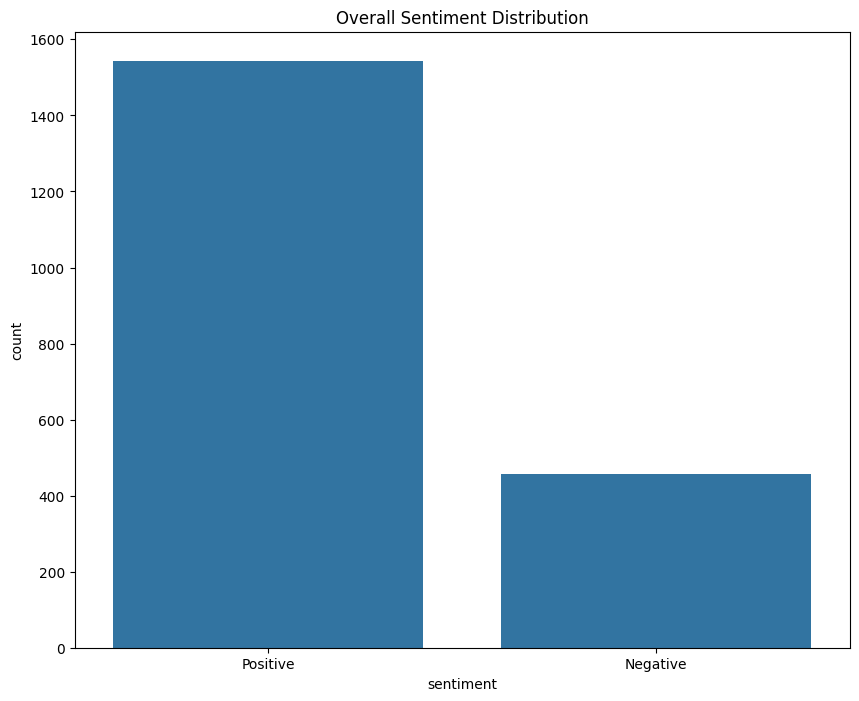

In [187]:
plt.figure(figsize=(10,8))
sns.countplot(x='sentiment',data=df)
plt.title('Overall Sentiment Distribution')
plt.show()

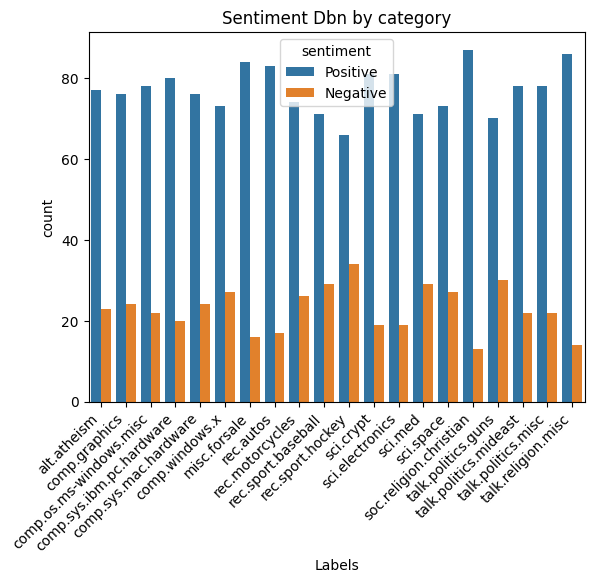

In [188]:
plt.figure(figure=(12,6))
sns.countplot(x='Labels',hue='sentiment',data=df)
plt.xticks(rotation=45,ha='right')
plt.title('Sentiment Dbn by category')
plt.show()

In [189]:
# Group by categories and sentiment
sentiment_distribution = df.groupby(['Labels','sentiment']).size().unstack()
print(sentiment_distribution)

sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [190]:
!pip install seaborn wordcloud

In [192]:
from wordcloud import WordCloud

In [195]:
# Generate word cloud for each sentiment
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_data'])
    wordcloud = WordCloud(width=15, height=5, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show() # Generate word cloud for each sentiment

ValueError: Couldn't find space to draw. Either the Canvas size is too small or too much of the image is masked out.

In [ ]:

for sentiment in df['sentiment'].unique():
    text = ''.join(df[df['sentiment'] == sentiment]['cleaned_data'])

    # Check if text is empty and skip if so
    if not text.strip():
        print(f"No text data for sentiment '{sentiment}', skipping...")
        continue

    # Adjust canvas size if necessary
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    plt.close()  # Close the figure after displaying


In [138]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = ''.join(df[df['sentiment'] == sentiment]['cleaned_data'])

    # Check if text is empty and skip if so
    if not text.strip():
        print(f"No text data for sentiment '{sentiment}', skipping...")
        continue

    # Adjust canvas size if necessary
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    plt.close()  # Close the figure after displaying


KeyboardInterrupt: 

In [137]:
# Generate word cloud for each category
for category in df['Labels'].unique():
  text=''.join(df[df['Labels']==category]['cleaned_data'])
  wordcloud=WordCloud(width=500,height=200,background_color='white').generate(text)
  plt.figure(figsize(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word cloud for {category} Category')
  plt.show()

KeyboardInterrupt: 

In [133]:
# Evaluation

In [134]:
from sklearn.metrics import accuracy_score,classification_report

In [135]:
accuracy_score(y_test,y_pred)

0.0375

In [136]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00        18
           comp.graphics       0.00      0.00      0.00        18
 comp.os.ms-windows.misc       0.00      0.00      0.00        22
comp.sys.ibm.pc.hardware       0.00      0.00      0.00        25
   comp.sys.mac.hardware       0.00      0.00      0.00        21
          comp.windows.x       0.00      0.00      0.00        25
            misc.forsale       0.00      0.00      0.00        18
               rec.autos       0.00      0.00      0.00        18
         rec.motorcycles       0.00      0.00      0.00        16
      rec.sport.baseball       0.00      0.00      0.00        18
        rec.sport.hockey       0.04      1.00      0.07        15
               sci.crypt       0.00      0.00      0.00        19
         sci.electronics       0.00      0.00      0.00        16
                 sci.med       0.00      0.00      0.00        17
         